In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\User\API_19_DS2_en_csv_v2_3442.csv")

# Reshape the data: Convert years into a single column and indicators into columns
df_melted = pd.melt(df, id_vars=['Country Name', 'Indicator Name'], 
                    var_name='Year', value_name='Value')

df_pivoted = df_melted.pivot_table(index=['Country Name', 'Year'], 
                                   columns='Indicator Name', 
                                   values='Value', aggfunc='first')

# Reset the index to make it a flat DataFrame
df_pivoted.reset_index(inplace=True)

# Select the relevant indicators
columns_to_select = [
    "Country Name", "Year", 
    "Agricultural land (% of land area)",  
    "Energy use (kg of oil equivalent per capita)", 
    "Forest area (% of land area)",  
    "Population growth (annual %)", 
    "Renewable energy consumption (% of total final energy consumption)", 
    "Urban population (% of total population)"
]

# Filter for the selected columns
selected_columns = df_pivoted[columns_to_select]

# Select the relevant countries
selected_countries = [
    "Argentina", "Australia", "Bangladesh", "Bhutan", "Botswana", "Brazil", 
    "Cameroon", "Canada", "Chile", "China", "Colombia", "Congo, Dem. Rep.", 
    "Costa Rica", "Czechia", "Denmark", "Egypt, Arab Rep.", "Ethiopia", 
    "Finland", "France", "Germany", "Ghana", "Greece", "Iceland", "India", 
    "Indonesia", "Iran, Islamic Rep.", "Italy", "Japan", "Jordan", 
    "Kazakhstan", "Kenya", "Korea, Rep.", "Malaysia", "Mexico", "Morocco", 
    "Netherlands", "New Zealand", "Nigeria", "Norway", "Pakistan", "Peru", 
    "Philippines", "Poland", "Russian Federation", "Saudi Arabia", "Singapore", 
    "South Africa", "Thailand", "Turkiye", "United States"
]

# Filter for the selected countries
countries = selected_columns[selected_columns['Country Name'].isin(selected_countries)]

# Select the relevant years
selected_years = [
    '1990', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', 
    '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', 
    '2017', '2018', '2019', '2020', '2021', '2022', '2023'
]

# Filter for the selected years
years = countries[countries['Year'].isin(selected_years)]

# Function to fill missing values by country for each indicator
def fill_na_by_group(df, group_col, method='mean'):
    """
    Fill missing values in indicator columns (by country) using mean or median.
    """
    # Ensure method is either 'mean' or 'median'
    assert method in ['mean', 'median'], "Method must be 'mean' or 'median'"
    
    # Make a copy of the DataFrame to avoid modifying the original in place
    df_copy = df.copy()
    
    # Get list of indicator columns (all columns except 'Country Name' and 'Year')
    indicator_columns = [col for col in df_copy.columns if col not in ['Country Name', 'Year']]
    
    # Convert the relevant columns to numeric type
    df_copy[indicator_columns] = df_copy[indicator_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by 'Country Name' and fill missing values for each indicator using mean or median
    for col in indicator_columns:
        if method == 'mean':
            df_copy.loc[:, col] = df_copy.groupby('Country Name')[col].transform(lambda x: x.fillna(x.mean()))
        elif method == 'median':
            df_copy.loc[:, col] = df_copy.groupby('Country Name')[col].transform(lambda x: x.fillna(x.median()))
    
    return df_copy

# Fill missing values with mean or median (you can switch to 'median' if preferred)
df_filled = fill_na_by_group(years, group_col='Country Name', method='mean')

# Display the updated dataset info
print("\nUpdated dataset after filling missing values:")
print(df_filled.info())

# Save the updated dataset to a new CSV file
output_file_path = r"C:\Users\User\4FTC2113_Cleaned_Finaldataset_(23113610).csv"
df_filled.to_csv(output_file_path, index=False)
print(f"\nFilled dataset saved to: {output_file_path}")


Updated dataset after filling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 690 to 16697
Data columns (total 8 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country Name                                                        1250 non-null   object 
 1   Year                                                                1250 non-null   object 
 2   Agricultural land (% of land area)                                  1250 non-null   float64
 3   Energy use (kg of oil equivalent per capita)                        1250 non-null   float64
 4   Forest area (% of land area)                                        1250 non-null   float64
 5   Population growth (annual %)                                        1250 non-null   float64
 6   Renewable energy consumption (% of total final energy consumption)  

In [5]:
data = pd.read_csv(r"C:\Users\User\4FTC2113_Cleaned_Finaldataset_(23113610).csv")
data

,Country Name,Year,Agricultural land (% of land area),Energy use (kg of oil equivalent per capita),Forest area (% of land area),Population growth (annual %),Renewable energy consumption (% of total final energy consumption),Urban population (% of total population)
0,Argentina,1990,46.612879,1406.262676,12.863715,1.491575,8.600000,86.984
1,Argentina,2000,46.958187,1654.129937,12.196486,1.133128,9.800000,89.142
2,Argentina,2001,46.993266,1556.318627,12.080871,1.097947,11.500000,89.329
3,Argentina,2002,47.031268,1496.508473,11.965257,1.069413,11.600000,89.510
4,Argentina,2003,47.174981,1584.791747,11.849643,1.033140,10.800000,89.686
...,...,...,...,...,...,...,...,...
1245,United States,2019,45.458843,7450.385513,33.866926,0.455381,10.200000,82.459
1246,United States,2020,45.334279,7450.385513,33.866926,0.969000,11.000000,82.664
1247,United States,2021,45.209715,7450.385513,33.866926,0.157343,10.900000,82.873
1248,United States,2022,45.085151,7450.385513,33.866926,0.367473,7.591304,83.084


In [63]:
# Function to validate the dataset
def validate_dataset(data):
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    if missing_values == 0:
        print("No missing values in the dataset.")
    else:
        print(f"There are {missing_values} missing values in the dataset.")

    # Check for duplicate rows
    duplicate_rows = data.duplicated().sum()
    if duplicate_rows == 0:
        print("No duplicate rows in the dataset.")
    else:
        print(f"There are {duplicate_rows} duplicate rows in the dataset.")

# Validate the dataset
validate_dataset(data)

No missing values in the dataset.
No duplicate rows in the dataset.


In [65]:
data.describe()

,Year,Agricultural land (% of land area),Energy use (kg of oil equivalent per capita),Forest area (% of land area),Population growth (annual %),Renewable energy consumption (% of total final energy consumption),Urban population (% of total population)
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.625455,0.478076,0.146595,0.418420,0.397288,0.289888,0.615928
std,0.242048,0.273931,0.149969,0.277564,0.081868,0.276829,0.235218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.223279,0.031739,0.196244,0.343058,0.076297,0.431734
50%,0.636364,0.544799,0.092915,0.403665,0.385350,0.198372,0.698703
75%,0.818182,0.659405,0.228109,0.598990,0.437118,0.421668,0.792464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country Name                                                        1250 non-null   object 
 1   Year                                                                1250 non-null   int64  
 2   Agricultural land (% of land area)                                  1250 non-null   float64
 3   Energy use (kg of oil equivalent per capita)                        1250 non-null   float64
 4   Forest area (% of land area)                                        1250 non-null   float64
 5   Population growth (annual %)                                        1250 non-null   float64
 6   Renewable energy consumption (% of total final energy consumption)  1250 non-null   float64
 7   Urban population

In [8]:
data.shape

(1250, 8)

In [9]:
len(data)

1250

In [10]:
# mean of each indicator by country for all the years
selected_columns1 = ['Country Name', 'Agricultural land (% of land area)', 	
                    'Energy use (kg of oil equivalent per capita)',	
                    'Forest area (% of land area)',	
                    'Population growth (annual %)',			
                    'Renewable energy consumption (% of total final energy consumption)',	
                    'Urban population (% of total population)']

filtered_country = data[selected_columns1]

filtered_country = filtered_country.dropna()

country_means = filtered_country.groupby('Country Name').mean()

print(country_means)

                    Agricultural land (% of land area)  \
Country Name                                             
Argentina                                    45.338988   
Australia                                    51.079385   
Bangladesh                                   71.590382   
Bhutan                                       13.798773   
Botswana                                     45.649119   
Brazil                                       27.636848   
Cameroon                                     20.091159   
Canada                                        6.612498   
Chile                                        18.779366   
China                                        55.759035   
Colombia                                     38.941854   
Congo, Dem. Rep.                             12.957459   
Costa Rica                                   35.591076   
Czechia                                      46.793048   
Denmark                                      66.347273   
Egypt, Arab Re

In [11]:
# mean of all the countries by year for each indicator
selected_columns2 = ['Year', 'Agricultural land (% of land area)', 
                    'Energy use (kg of oil equivalent per capita)',	
                    'Forest area (% of land area)',	
                    'Population growth (annual %)',	
                    'Renewable energy consumption (% of total final energy consumption)',	
                    'Urban population (% of total population)']

filtered_year = data[selected_columns2]

filtered_year = filtered_year.dropna()

year_means = filtered_year.groupby('Year').mean()

print(year_means)

      Agricultural land (% of land area)  \
Year                                       
1990                           40.288617   
2000                           40.360982   
2001                           40.231727   
2002                           39.962805   
2003                           39.825974   
2004                           39.613293   
2005                           39.416170   
2006                           39.287917   
2007                           39.230814   
2008                           39.059916   
2009                           39.035268   
2010                           38.986832   
2011                           39.030665   
2012                           39.004859   
2013                           38.973730   
2014                           38.764830   
2015                           38.665486   
2016                           38.620567   
2017                           38.650800   
2018                           38.557889   
2019                           3

# 1. How have energy use and renewable energy adoption trends impacted global warming?

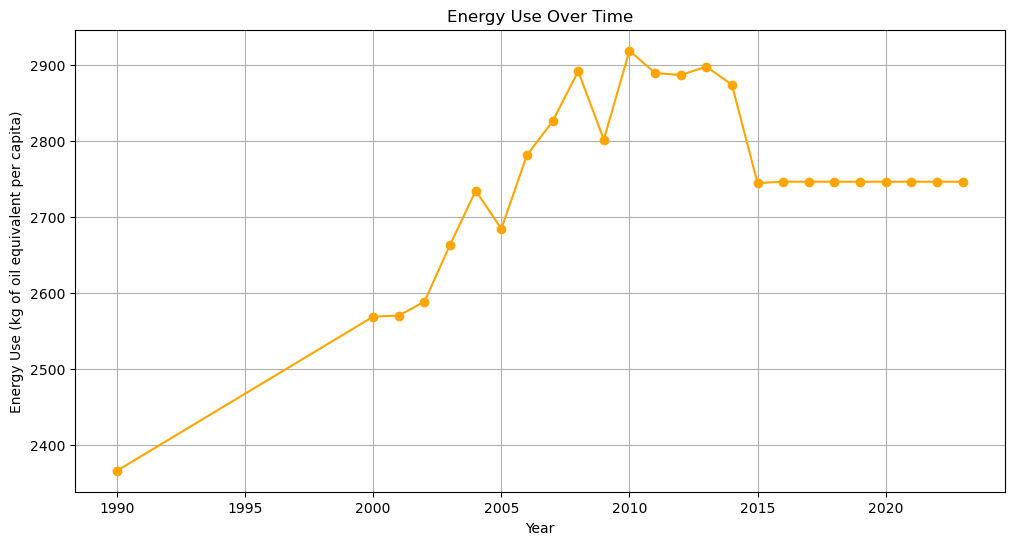

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(year_means.index, year_means['Energy use (kg of oil equivalent per capita)'], marker='o', color='orange')
plt.title('Energy Use Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.grid(True)
plt.show()

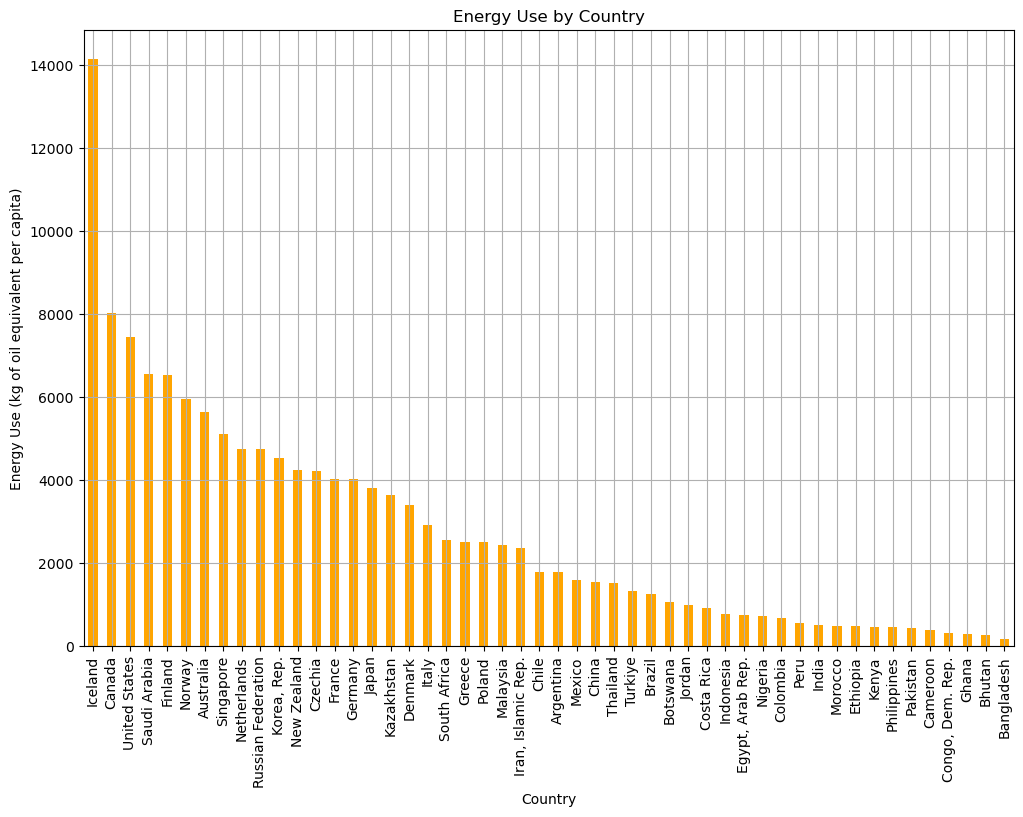

In [14]:
ene_use = data.groupby(['Country Name'])['Energy use (kg of oil equivalent per capita)'].mean()

ene_use_sorted = ene_use.sort_values(ascending=False)

ene_use_sorted.plot(kind='bar', color='orange',figsize=(12, 8))
plt.title('Energy Use by Country')
plt.xlabel('Country')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.grid(True)
plt.show()

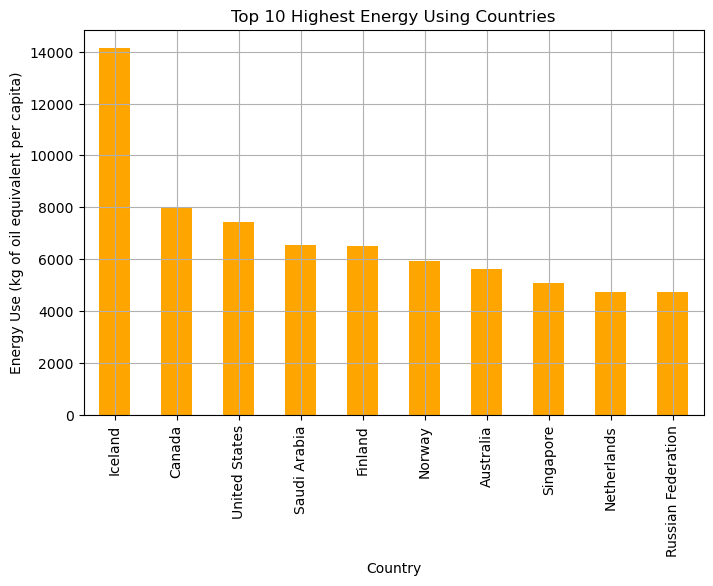

In [15]:
ene_use_sorted.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Top 10 Highest Energy Using Countries')
plt.xlabel('Country')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.xlim(-0.5,9.5)
plt.grid(True)
plt.show()

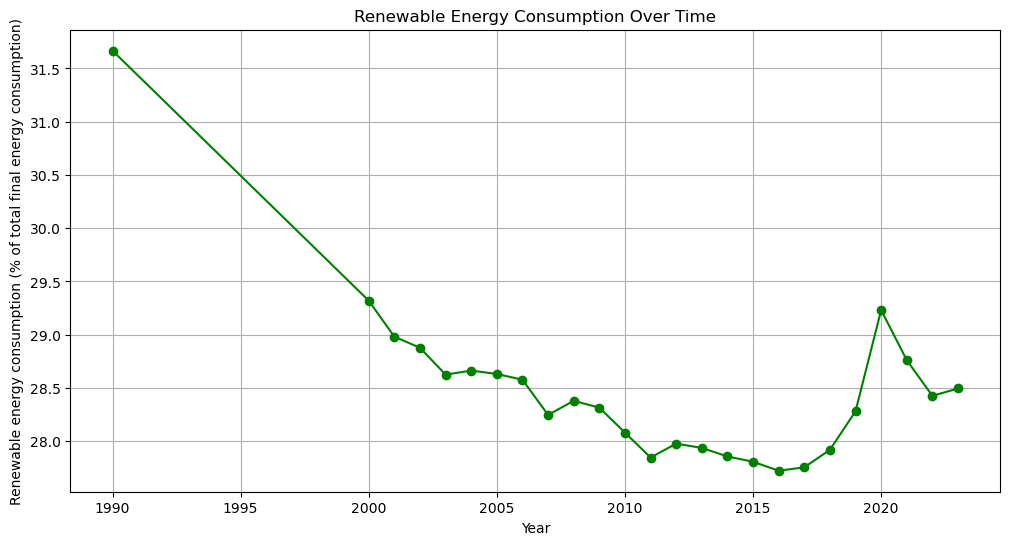

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(year_means.index, year_means['Renewable energy consumption (% of total final energy consumption)'], marker='o', color='green')
plt.title('Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable energy consumption (% of total final energy consumption)')
plt.grid(True)
plt.show()

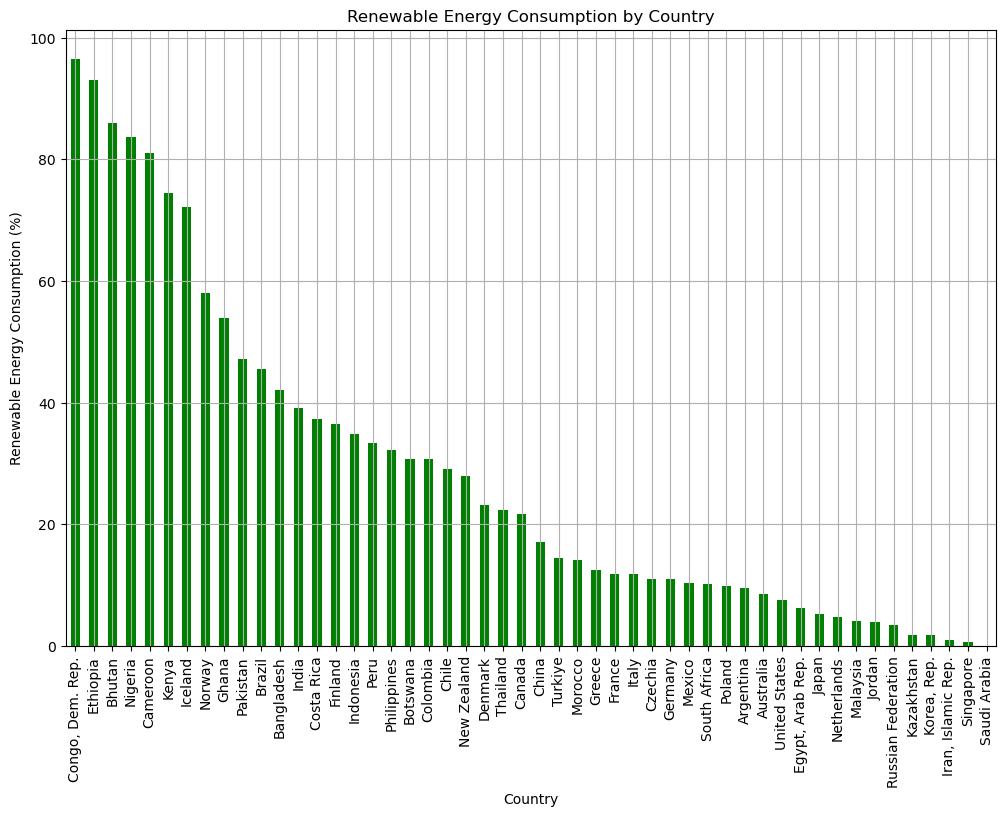

In [17]:
renew_ene_con = data.groupby(['Country Name'])['Renewable energy consumption (% of total final energy consumption)'].mean()

renew_ene_con_sorted = renew_ene_con.sort_values(ascending=False)

renew_ene_con_sorted.plot(kind='bar', color='green', figsize=(12, 8))
plt.title('Renewable Energy Consumption by Country')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Consumption (%)')
plt.grid(True)
plt.show()

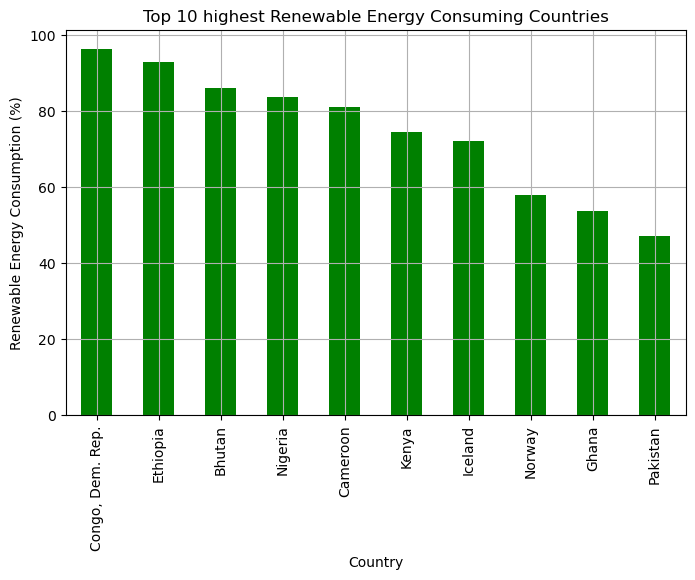

In [18]:
renew_ene_con_sorted.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Top 10 highest Renewable Energy Consuming Countries')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Consumption (%)')
plt.xlim(-0.5,9.5)
plt.grid(True)
plt.show()

# 2. What is the role of forest areas and agricultural land in mitigating global warming?

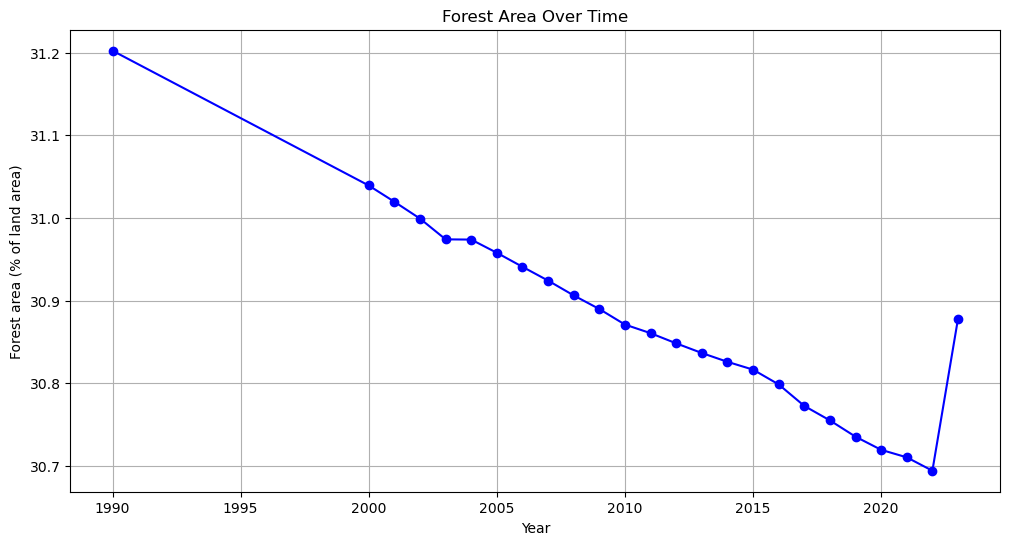

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(year_means.index, year_means['Forest area (% of land area)'], marker='o', color='blue')
plt.title('Forest Area Over Time')
plt.xlabel('Year')
plt.ylabel('Forest area (% of land area)')
plt.grid(True)
plt.show()

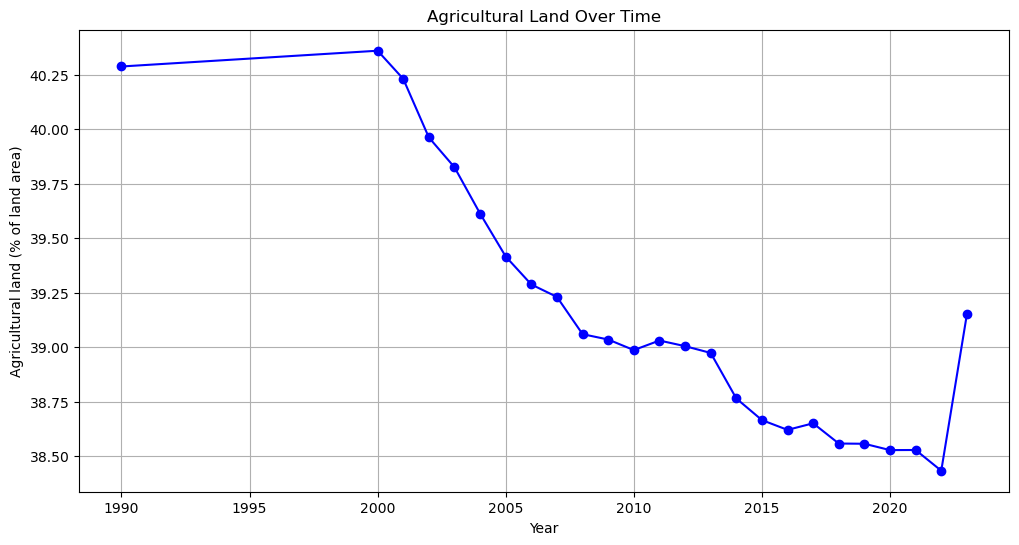

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(year_means.index, year_means['Agricultural land (% of land area)'], marker='o', color='blue')
plt.title('Agricultural Land Over Time')
plt.xlabel('Year')
plt.ylabel('Agricultural land (% of land area)')
plt.grid(True)
plt.show()

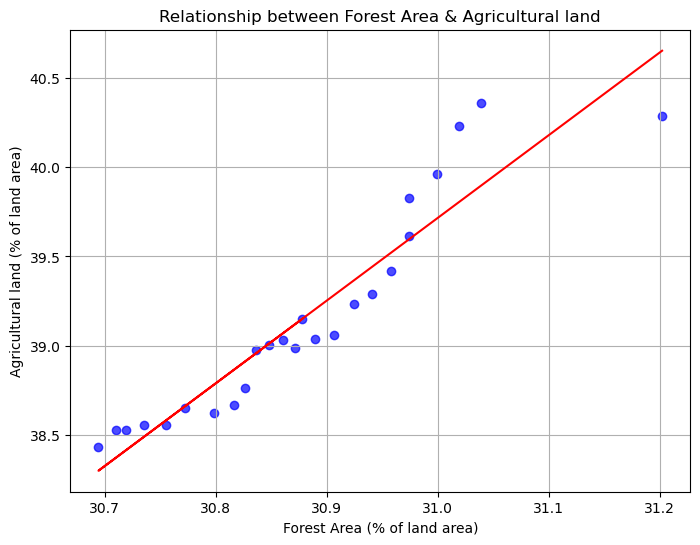

In [22]:
x = year_means["Forest area (% of land area)"] 
y = year_means["Agricultural land (% of land area)"] 

coefficients = np.polyfit(x, y, 1)  
slope, intercept = coefficients
regression_line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, c="blue")
plt.plot(x, regression_line, color="red", label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")
plt.title("Relationship between Forest Area & Agricultural land")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Agricultural land (% of land area)")
plt.grid(True)
plt.show()

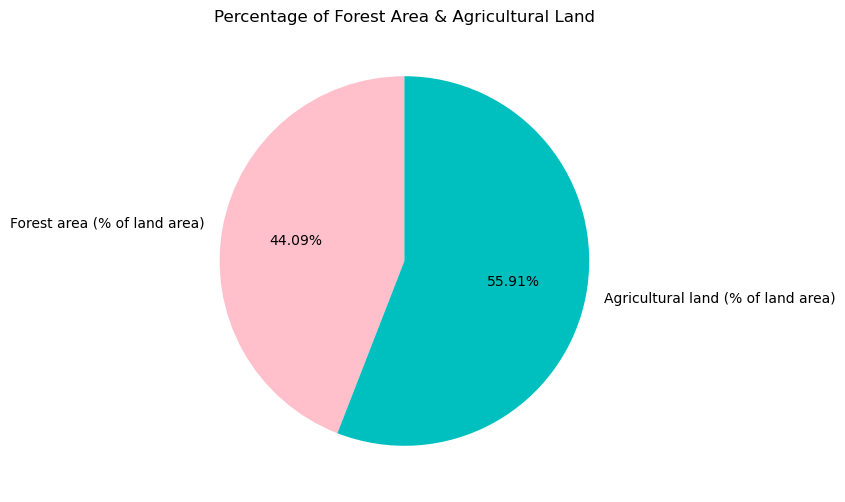

In [23]:
df = pd.DataFrame(data)

total_sum = df['Forest area (% of land area)'].sum() + df['Agricultural land (% of land area)'].sum()

sizes = [
    (df['Forest area (% of land area)'].sum() / total_sum) * 100,
    (df['Agricultural land (% of land area)'].sum() / total_sum) * 100
]
labels = ['Forest area (% of land area)', 'Agricultural land (% of land area)']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['pink', 'c'])
plt.title('Percentage of Forest Area & Agricultural Land')
plt.show()


# 3. How to reduce the effect of urbanization and population growth through environmental sustainability, which impacts global warming?

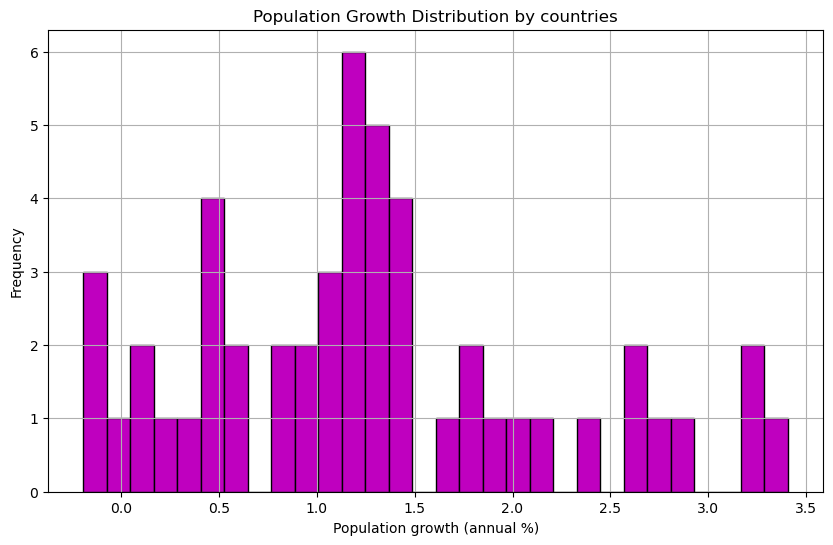

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(country_means['Population growth (annual %)'], bins=30, color='m', edgecolor='black')
plt.title('Population Growth Distribution by countries')
plt.xlabel('Population growth (annual %)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


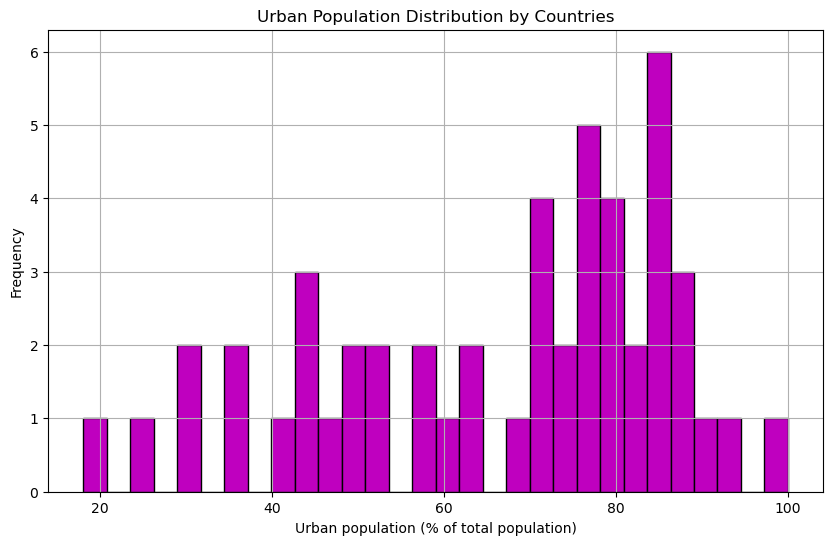

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(country_means['Urban population (% of total population)'], bins=30, color='m', edgecolor='black')
plt.title('Urban Population Distribution by Countries')
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


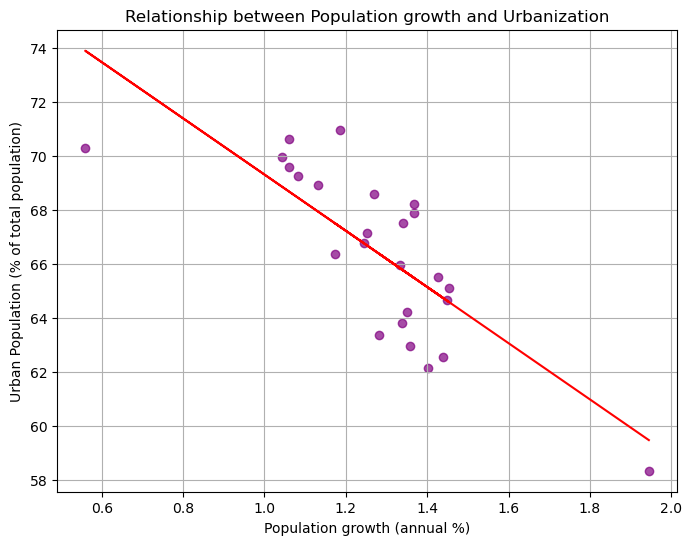

In [53]:
x = year_means["Population growth (annual %)"] 
y = year_means["Urban population (% of total population)"] 

coefficients = np.polyfit(x, y, 1)  
slope, intercept = coefficients
regression_line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, c="purple")
plt.plot(x, regression_line, color="red", label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")
plt.title('Relationship between Population growth and Urbanization')
plt.xlabel('Population growth (annual %)')
plt.ylabel('Urban Population (% of total population)')
plt.grid(True)
plt.show()